<a href="https://colab.research.google.com/github/vinicius-mattoso/GA_find_percolation/blob/main/Maze_Solver_with_loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Define the maze as a 2D array, where 0 represents a wall and 1 represents a path.

In [1]:
maze = [[1, 0, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 1, 1, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]]

In [2]:
start_points = [(0, 0), (2, 1)]
end_points = [(4, 3), (2, 3)]

In [3]:
def is_valid_move(point):
    row, col = point
    if row < 0 or col < 0 or row >= len(maze) or col >= len(maze[0]):
        return False
    if maze[row][col] == 0:
        return False
    return True

In [4]:
from collections import deque

def bfs(start):
    visited = set()
    queue = deque([(start, 0)])
    distances = {}
    while queue:
        curr, dist = queue.popleft()
        if curr in visited:
            continue
        visited.add(curr)
        if curr in end_points:
            distances[curr] = dist
        for move in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            next_point = (curr[0] + move[0], curr[1] + move[1])
            if is_valid_move(next_point) and next_point not in visited:
                queue.append((next_point, dist + 1))
    return distances

In [5]:
min_distance = float('inf')
for start in start_points:
    distances = bfs(start)
    for end in end_points:
        if end in distances:
            min_distance = min(min_distance, distances[end])

In [6]:
print(min_distance)

10


# Nova versão


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue

def solve_maze(maze, starts, ends):
    # Define the directions
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    # Initialize the queue
    q = Queue()
    for start in starts:
        q.put(start)

    # Initialize the distances
    distances = np.zeros_like(maze, dtype=np.int32)
    distances.fill(-1)
    for start in starts:
        distances[start] = 0

    # Search for the end points
    while not q.empty():
        current = q.get()
        for direction in directions:
            next_pos = (current[0] + direction[0], current[1] + direction[1])
            if (next_pos[0] >= 0 and next_pos[0] < maze.shape[0] and
                next_pos[1] >= 0 and next_pos[1] < maze.shape[1] and
                maze[next_pos] == 0 and distances[next_pos] == -1):
                distances[next_pos] = distances[current] + 1
                q.put(next_pos)

    # Find the shortest path from each start to each end
    paths = []
    for start in starts:
        start_paths = []
        for end in ends:
            if distances[end] != -1:
                current = end
                path = [end]
                while current != start:
                    for direction in directions:
                        next_pos = (current[0] + direction[0], current[1] + direction[1])
                        if (next_pos[0] >= 0 and next_pos[0] < maze.shape[0] and
                            next_pos[1] >= 0 and next_pos[1] < maze.shape[1] and
                            distances[next_pos] == distances[current] - 1):
                            path.append(next_pos)
                            current = next_pos
                            break
                path.reverse()
                start_paths.append(path)
        paths.append(start_paths)

    return paths

def draw_maze(maze, paths=None):
    # Create the plot
    fig, ax = plt.subplots(figsize=(maze.shape[1]/2, maze.shape[0]/2))

    # Draw the maze
    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')

    # Draw the paths
    if paths is not None:
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, start_paths in enumerate(paths):
            color = colors[i % len(colors)]
            for path in start_paths:
                ax.plot([pos[1]+0.5 for pos in path], [pos[0]+0.5 for pos in path],
                        color=color, linewidth=2)

    # Remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()

# Example usage
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0],
    ])

starts = [(0, 0), (3, 4)]
ends = [(3, 0), (0, 4)]

# paths = solve_maze(maze, starts, ends)
# draw_maze(maze, paths)[0, 0, 0, 1, 0]



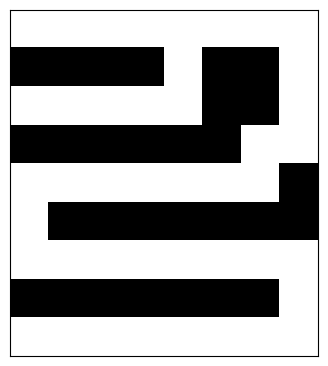

In [8]:
maze = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])

# starts = [(0, 0), (4, 4)]
# ends = [(4, 7), (2, 3)]
starts = [(0, 0)]
ends = [(4, 7)]
paths = solve_maze(maze, starts, ends)
draw_maze(maze, paths)

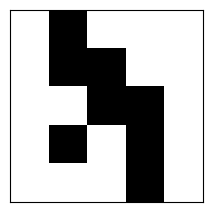

In [9]:
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0]
])

starts = [(0, 0)]
ends = [(4, 4)]
paths = solve_maze(maze, starts, ends)
draw_maze(maze, paths)

In [10]:
from matplotlib import colors

def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=20)
    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=20)
    if path:
        ax.plot([p[1] for p in path], [p[0] for p in path], linewidth=3, color='yellow')
    plt.show()

In [11]:
def solve_maze(maze, starts, ends):
    queue = deque()
    for start in starts:
        queue.append((start, []))

    visited = set()

    while queue:
        curr_pos, path = queue.popleft()

        if curr_pos in ends:
            return path + [curr_pos]

        if curr_pos in visited:
            continue

        visited.add(curr_pos)

        for move in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            next_pos = (curr_pos[0] + move[0], curr_pos[1] + move[1])

            if not (0 <= next_pos[0] < maze.shape[0] and 0 <= next_pos[1] < maze.shape[1]):
                continue

            if maze[next_pos[0], next_pos[1]] == 1:
                continue

            queue.append((next_pos, path + [curr_pos]))

    return None


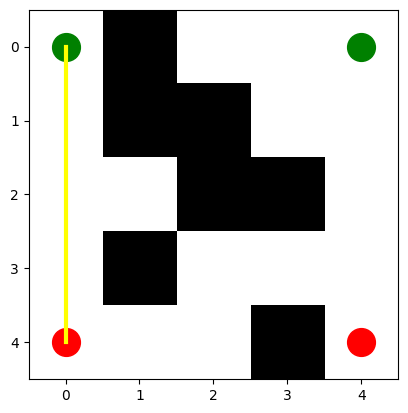

In [12]:
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

starts = [(0, 0),(0,4)]
ends = [(4, 4),(4,0)]
# paths = solve_maze(maze, starts, ends)
# draw_maze(maze, paths)
path = solve_maze(maze, starts, ends)
draw_maze(maze, starts, ends, path)

In [13]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from matplotlib import colors


def create_maze(size, complexity=0.5, density=0.5):
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (size[0] + size[1])))
    density = int(density * ((size[0] // 2) * (size[1] // 2)))

    # Build actual maze
    maze = np.zeros(size, dtype=int)

    # Fill borders
    maze[0, :] = 1
    maze[-1, :] = 1
    maze[:, 0] = 1
    maze[:, -1] = 1

    # Make aisles
    for i in range(density):
        x, y = np.random.randint(0, size[1] // 2) * 2, np.random.randint(0, size[0] // 2) * 2
        maze[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < size[1] - 2:   neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < size[0] - 2:   neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[np.random.randint(0, len(neighbours))]
                if maze[y_, x_] == 0:
                    maze[y_, x_] = 1
                    maze[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_

    return maze


def solve_maze(maze, starts, ends):
    queue = deque()
    for start in starts:
        queue.append((start, []))

    visited = set()

    while queue:
        curr_pos, path = queue.popleft()

        if curr_pos in ends:
            return path + [curr_pos]

        if curr_pos in visited:
            continue

        visited.add(curr_pos)

        for move in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            next_pos = (curr_pos[0] + move[0], curr_pos[1] + move[1])

            if not (0 <= next_pos[0] < maze.shape[0] and 0 <= next_pos[1] < maze.shape[1]):
                continue

            if maze[next_pos[0], next_pos[1]] == 1:
                continue

            queue.append((next_pos, path + [curr_pos]))

    return None


def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=20)
    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=20)

    if path is not None:
        for i in range(len(path)-1):
          curr_pos = path[i]
          next_pos = path[i+1]
          ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=5)

    plt.show()



In [14]:
def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=20)

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=20)

    if path is not None:
        for i in range(len(path)-1):
            curr_pos = path[i]
            next_pos = path[i+1]
            ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=5)

    plt.show()


None


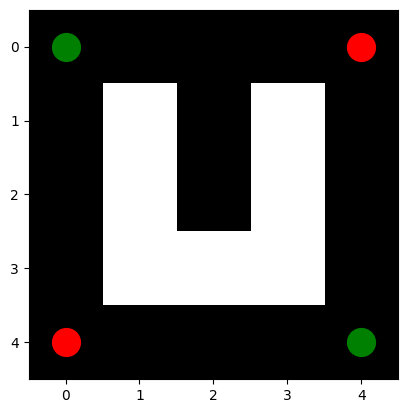

In [15]:
maze = create_maze((5, 5))
starts = [(0, 0), (4, 4)]
ends = [(4, 0), (0, 4)]

path = solve_maze(maze, starts, ends)
print(path)

draw_maze(maze, starts, ends, path)

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (2, 1), (1, 1), (1, 2), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4)]


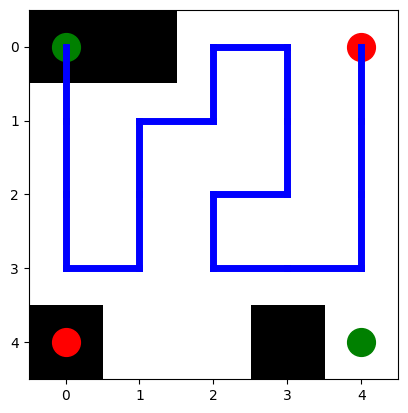

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors


def create_maze(size):
    maze = np.zeros(size, dtype=int)

    # Generate random walls
    for i in range(size[0]):
        for j in range(size[1]):
            if random.random() < 0.3:
                maze[i, j] = 1

    return maze


def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def dfs(start, end):
        visited = set()
        stack = [(start, [start])]
        while stack:
            (x, y), path = stack.pop()
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        stack.append((next_pos, next_path))
        return None

    paths = []
    for start in starts:
        for end in ends:
            path = dfs(start, end)
            if path is not None:
                paths.append(path)

    return paths[0] if paths else None


def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=20)

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=20)

    if path is not None:
        for i in range(len(path)-1):
            curr_pos = path[i]
            next_pos = path[i+1]
            ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=5)

    plt.show()


# Example usage
maze = create_maze((5, 5))
starts = [(0, 0), (4, 4)]
ends = [(4, 0), (0, 4)]

path = solve_maze(maze, starts, ends)
print(path)

draw_maze(maze, starts, ends, path)


In [17]:
def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def dfs(start, end):
        visited = set()
        stack = [(start, [start])]
        while stack:
            (x, y), path = stack.pop()
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        stack.append((next_pos, next_path))
        return None

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    paths = []
    for start in valid_starts:
        for end in ends:
            path = dfs(start, end)
            if path is not None:
                paths.append(path)

    return paths[0] if paths else None

[(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 0)]


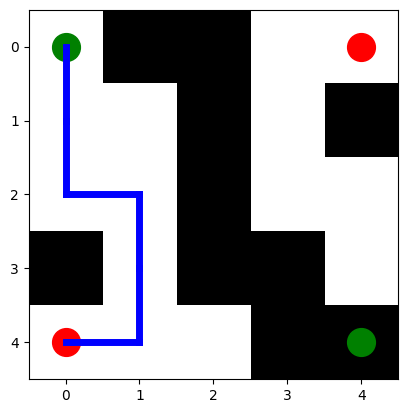

In [18]:
# Example usage
maze = create_maze((5, 5))
starts = [(0, 0), (4, 4)]
ends = [(4, 0), (0, 4)]

path = solve_maze(maze, starts, ends)
print(path)

draw_maze(maze, starts, ends, path)


In [19]:
def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def bfs(start, end):
        queue = [(start, [start])]
        visited = set()
        while queue:
            (x, y), path = queue.pop(0)
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        queue.append((next_pos, next_path))

        return None

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    shortest_path = None
    shortest_path_length = float('inf')
    for start in valid_starts:
        for end in ends:
            path = bfs(start, end)
            if path is not None and len(path) < shortest_path_length:
                shortest_path = path
                shortest_path_length = len(path)

    return shortest_path if shortest_path is not None else None


[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (0, 4)]


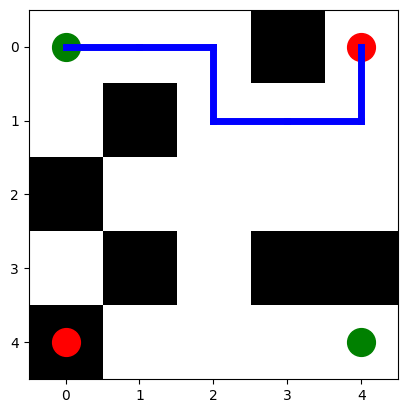

In [20]:
# Example usage
maze = create_maze((5, 5))
starts = [(0, 0), (4, 4)]
ends = [(4, 0), (0, 4)]

path = solve_maze(maze, starts, ends)
print(path)

draw_maze(maze, starts, ends, path)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]


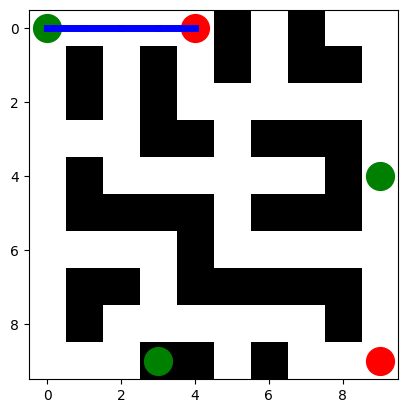

In [21]:
import numpy as np
from PIL import Image

# Define the maze
maze = np.array([
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
])

# Define the starting positions and ending positions
starts = [(0, 0), (4, 9), (9, 3)]
ends = [(9, 9), (0, 4)]

path = solve_maze(maze, starts, ends)
print(path)

draw_maze(maze, starts, ends, path)


In [22]:
def create_maze(size):
    maze = np.zeros(size, dtype=int)

    # Generate random walls
    for i in range(size[0]):
        for j in range(size[1]):
            if random.random() < 0.3:
                maze[i, j] = 1

    return maze

In [23]:
def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def bfs(start, end):
        queue = [(start, [start])]
        visited = set()
        while queue:
            (x, y), path = queue.pop(0)
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        queue.append((next_pos, next_path))

        return None

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    shortest_path = None
    shortest_path_length = float('inf')
    for start in valid_starts:
        for end in ends:
            path = bfs(start, end)
            if path is not None and len(path) < shortest_path_length:
                shortest_path = path
                shortest_path_length = len(path)

    return shortest_path if shortest_path is not None else None

In [24]:
# Draw continuos lines

# def draw_maze(maze, starts, ends, path=None):
#     cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
#     bounds = [0, 0.5, 1.5, 2.5, 3.5]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     fig, ax = plt.subplots(figsize=(20, 20))
#     ax.imshow(maze, cmap=cmap, norm=norm)

#     for start in starts:
#         ax.plot(start[1], start[0], 'go', markersize=5)

#     for end in ends:
#         ax.plot(end[1], end[0], 'ro', markersize=5)

#     if path is not None:
#         for i in range(len(path)-1):
#             curr_pos = path[i]
#             next_pos = path[i+1]
#             ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=3)

#     plt.show()

#Draw in points
import matplotlib.pyplot as plt
from matplotlib import colors

def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=5)

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=5)

    if path is not None:
        x_coords = [pos[1] for pos in path]
        y_coords = [pos[0] for pos in path]
        ax.plot(x_coords, y_coords, 'bo', markersize=5)

    plt.show()

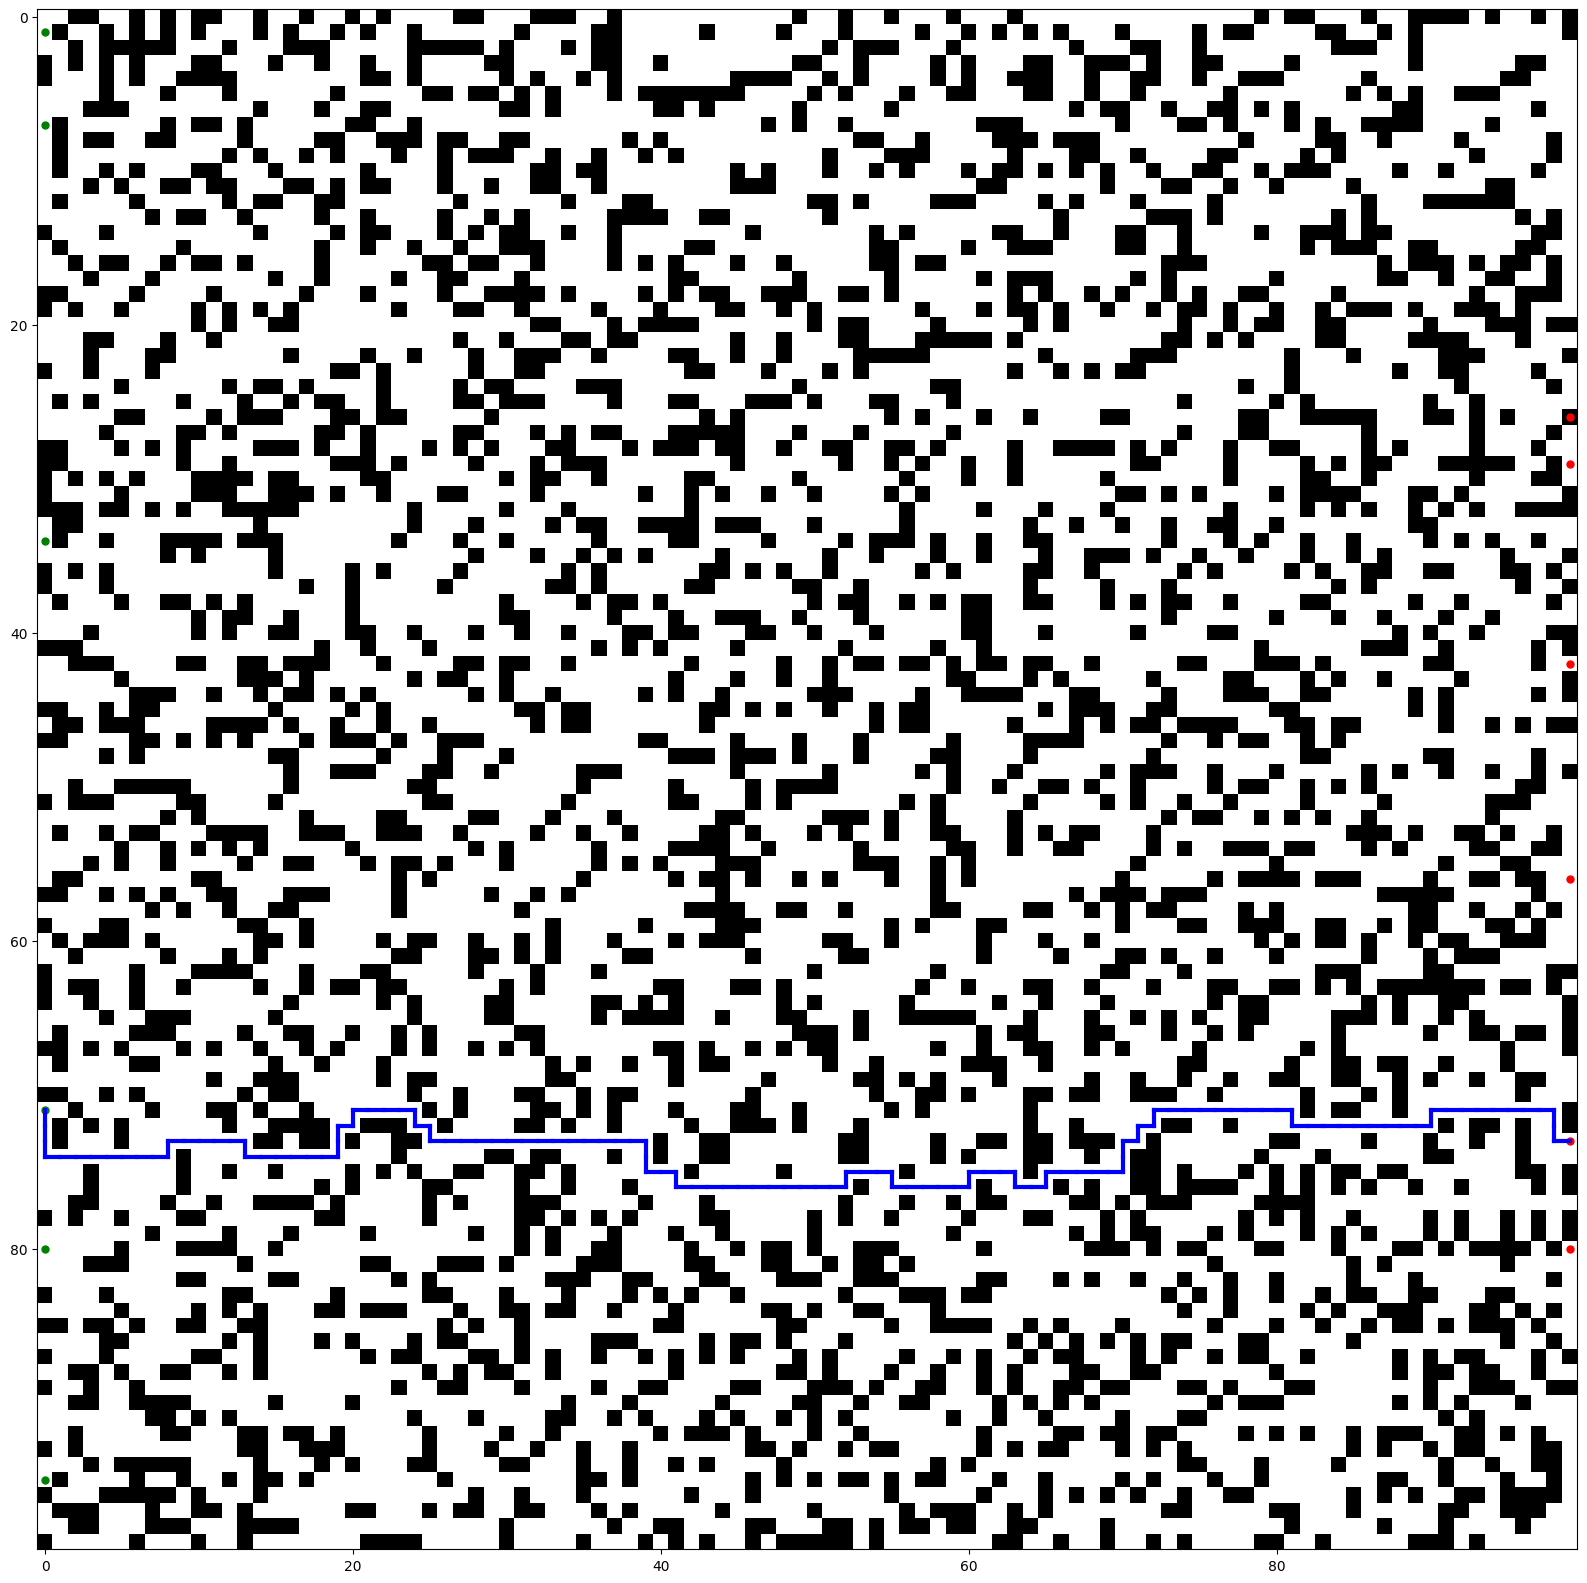

Muito bem esse meio poroso é percolado!
O caminho possui : 126 pontos


In [25]:
# Example usage
import random

start = 0
end  = 99

maze = create_maze((end+1, end+1))
# starts = [(0, 0), (40, 99)]
# ends = [(99, 0), (0, 99)]

cord1 = random.randint(start,end)
cord2 = random.randint(start,end)
cord1a = random.randint(start,end)
cord2a = random.randint(start,end)
cord1b = random.randint(start,end)
cord2b = random.randint(start,end)
cord3 = random.randint(start,end)
cord4 = random.randint(start,end)
cord3a = random.randint(start,end)
cord4a = random.randint(start,end)
cord3b = random.randint(start,end)
cord4b = random.randint(start,end)

# starts = [(cord1, start), (cord2, start)]
# ends = [(cord3, end), ( cord4, end)]

starts = [(cord1, start), (cord2, start),(cord1a, start), (cord2a, start),(cord1b, start), (cord2b, start)]
ends = [(cord3, end), ( cord4, end),(cord3a, end), ( cord4a, end),(cord3b, end), ( cord4b, end)]

path = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')

# print(path)


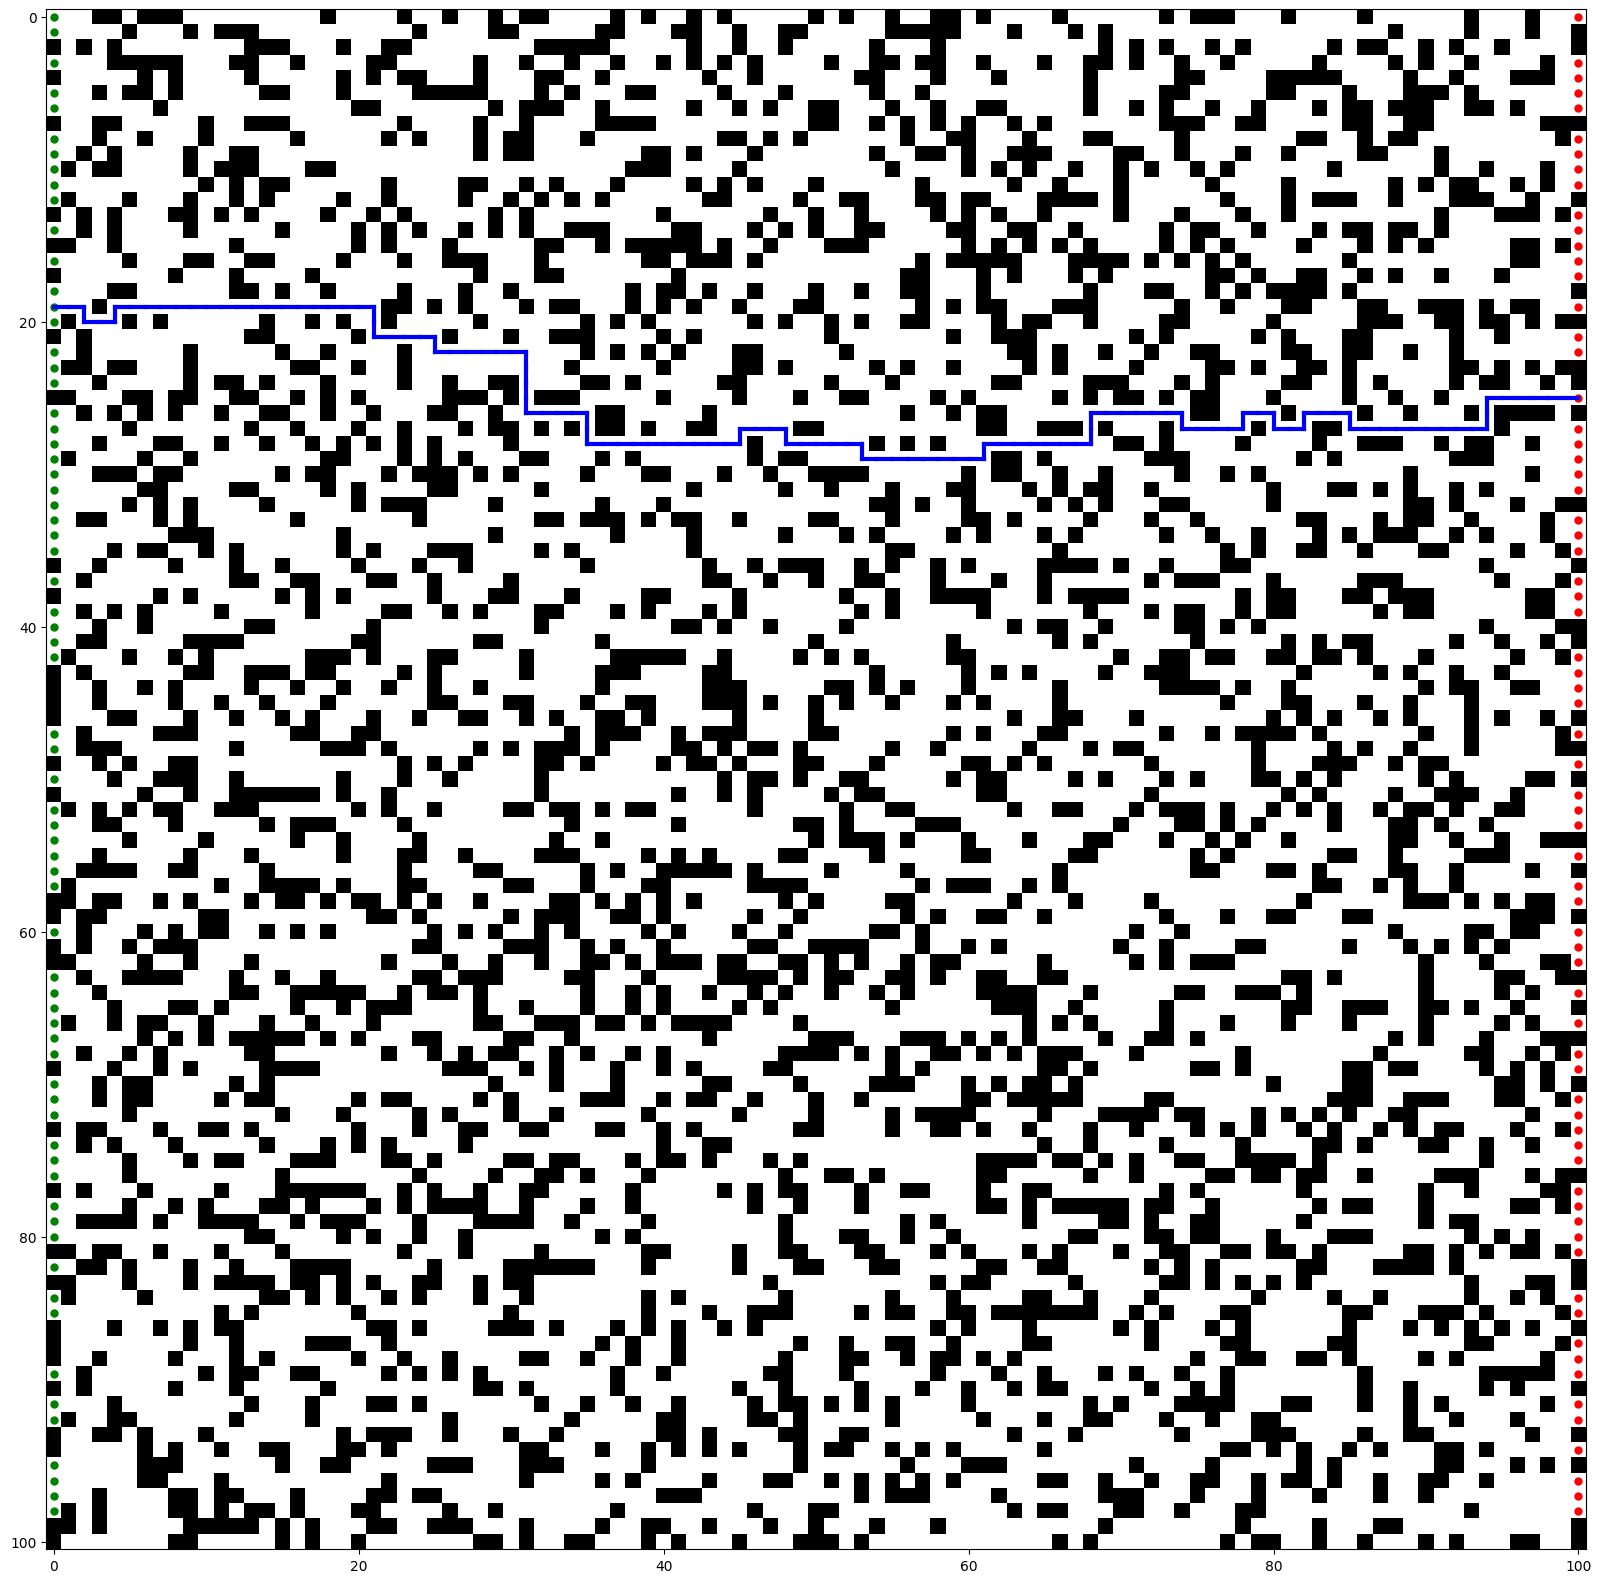

Muito bem esse meio poroso é percolado!
O caminho possui : 125 pontos
243.1864356994629 segundos


In [26]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = 100

maze = create_maze((end+1, end+1))

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')


tempo_final = time.time() # em segundos
#Print do tempo que demorou para rodar a parte específica do código
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

## Método do A*

In [31]:
import heapq

def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def heuristic_distance(pos, end):
        return abs(end[0] - pos[0]) + abs(end[1] - pos[1])  # Manhattan distance

    def astar(start, end):
        heap = [(0, start, [start])]
        visited = set()

        while heap:
            cost, current, path = heapq.heappop(heap)
            if current == end:
                return path

            if current not in visited:
                visited.add(current)
                for next_pos in get_adjacent_positions(current):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        next_cost = len(next_path) + heuristic_distance(next_pos, end)
                        heapq.heappush(heap, (next_cost, next_pos, next_path))

        return None

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    shortest_path = None
    shortest_path_length = float('inf')
    for start in valid_starts:
        for end in ends:
            path = astar(start, end)
            if path is not None and len(path) < shortest_path_length:
                shortest_path = path
                shortest_path_length = len(path)

    return shortest_path if shortest_path is not None else None

## Rodando no mesmo caso anteriror

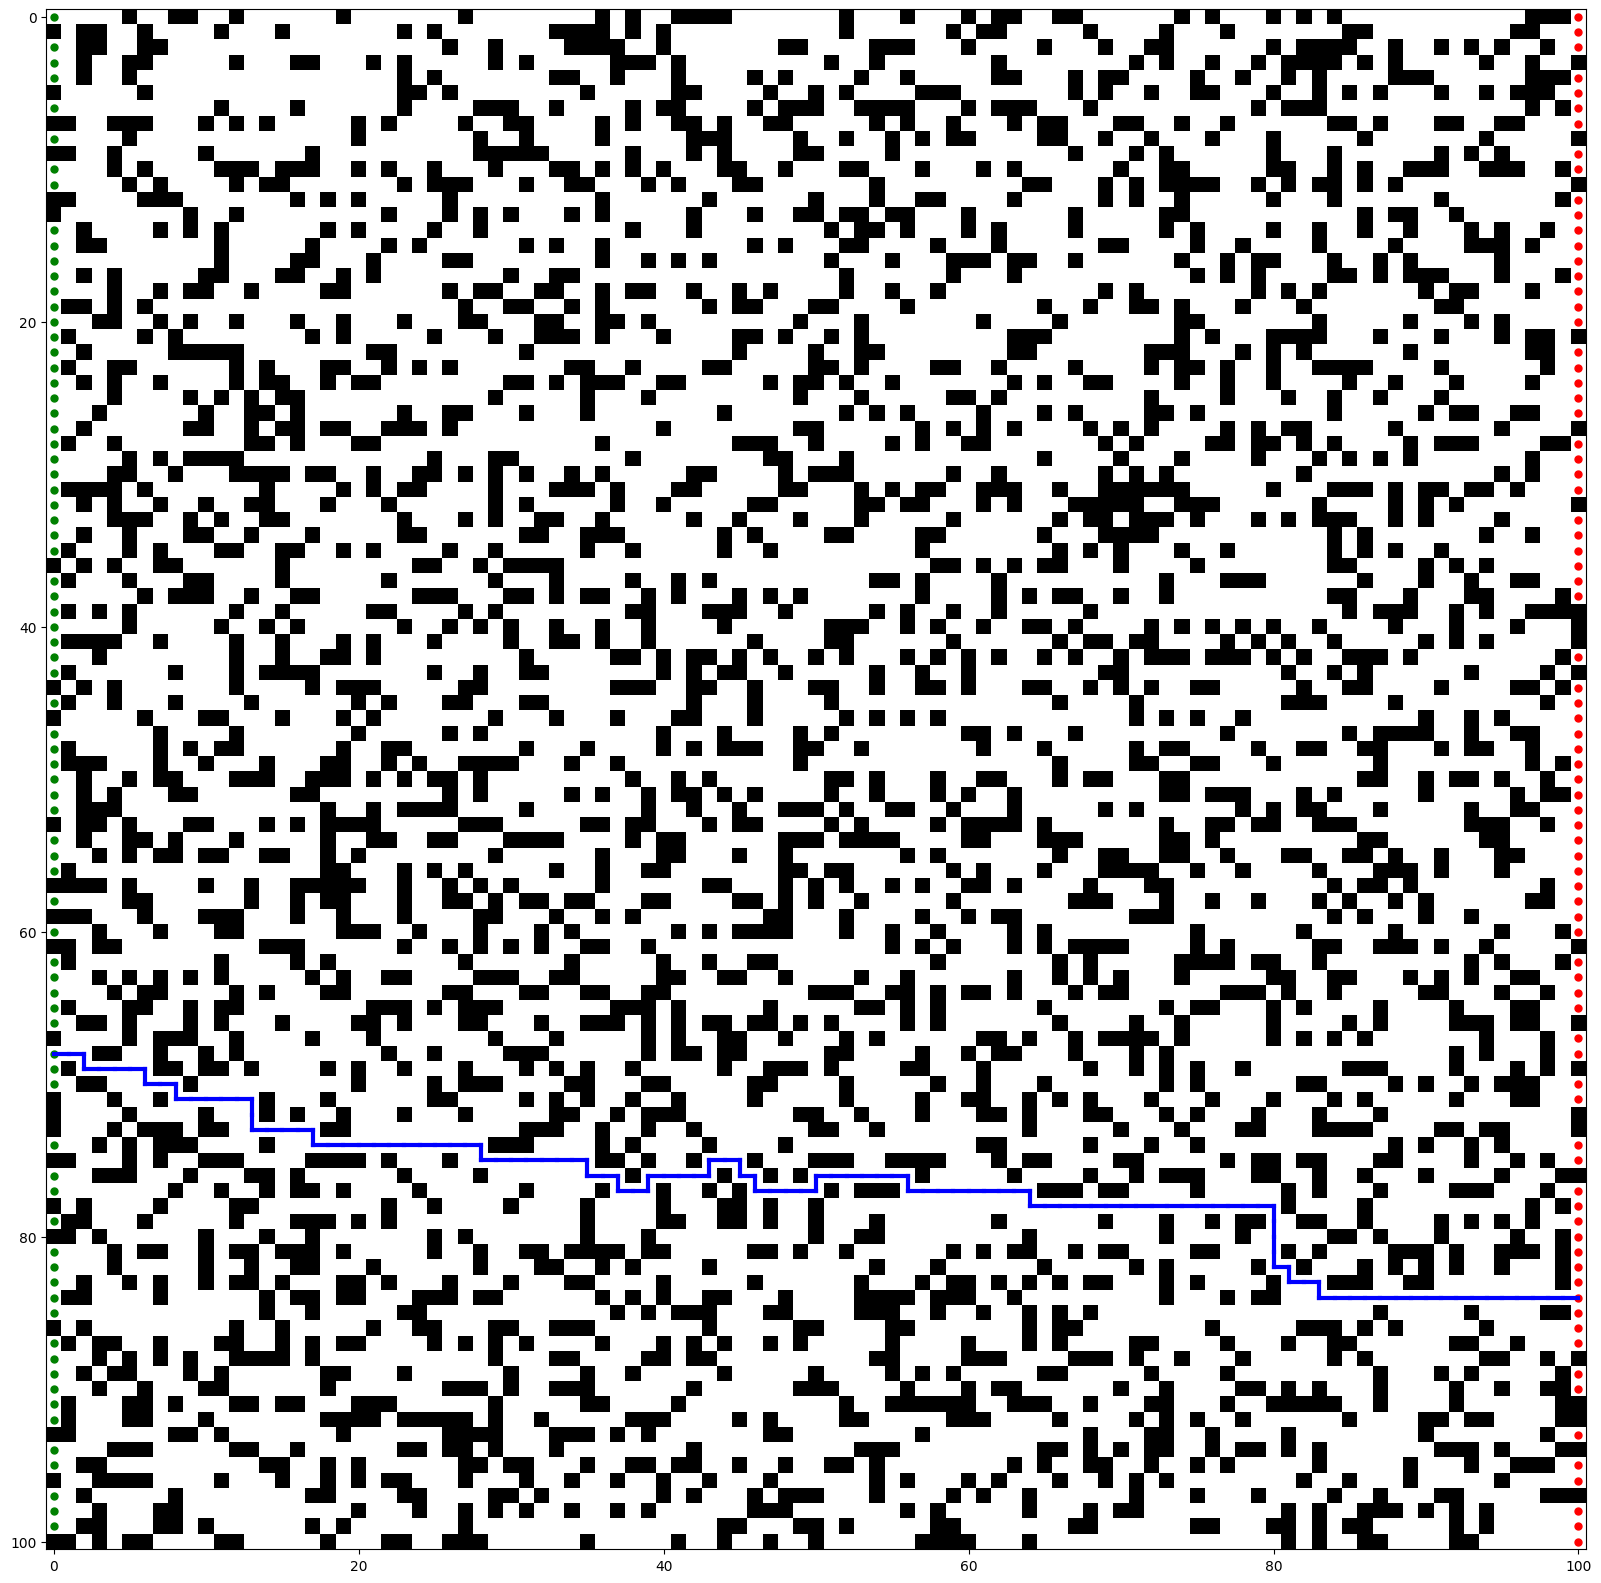

Muito bem esse meio poroso é percolado!
O caminho possui : 123 pontos
157.95007610321045 segundos


In [32]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = 100

maze = create_maze((end+1, end+1))

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')


tempo_final = time.time() # em segundos
#Print do tempo que demorou para rodar a parte específica do código
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

In [33]:
def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def bfs(start, end):
        queue = [(start, [start])]
        visited = set()

        while queue:
            (x, y), path = queue.pop(0)
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        queue.append((next_pos, next_path))

        return None

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    shortest_path = None
    shortest_path_length = float('inf')
    for start in valid_starts:
        for end in ends:
            forward_path = bfs(start, end)
            backward_path = bfs(end, start)
            if forward_path is not None and backward_path is not None:
                path_length = len(forward_path) + len(backward_path) - 1
                if path_length < shortest_path_length:
                    shortest_path = forward_path + backward_path[::-1][1:]
                    shortest_path_length = path_length

    return shortest_path if shortest_path is not None else None

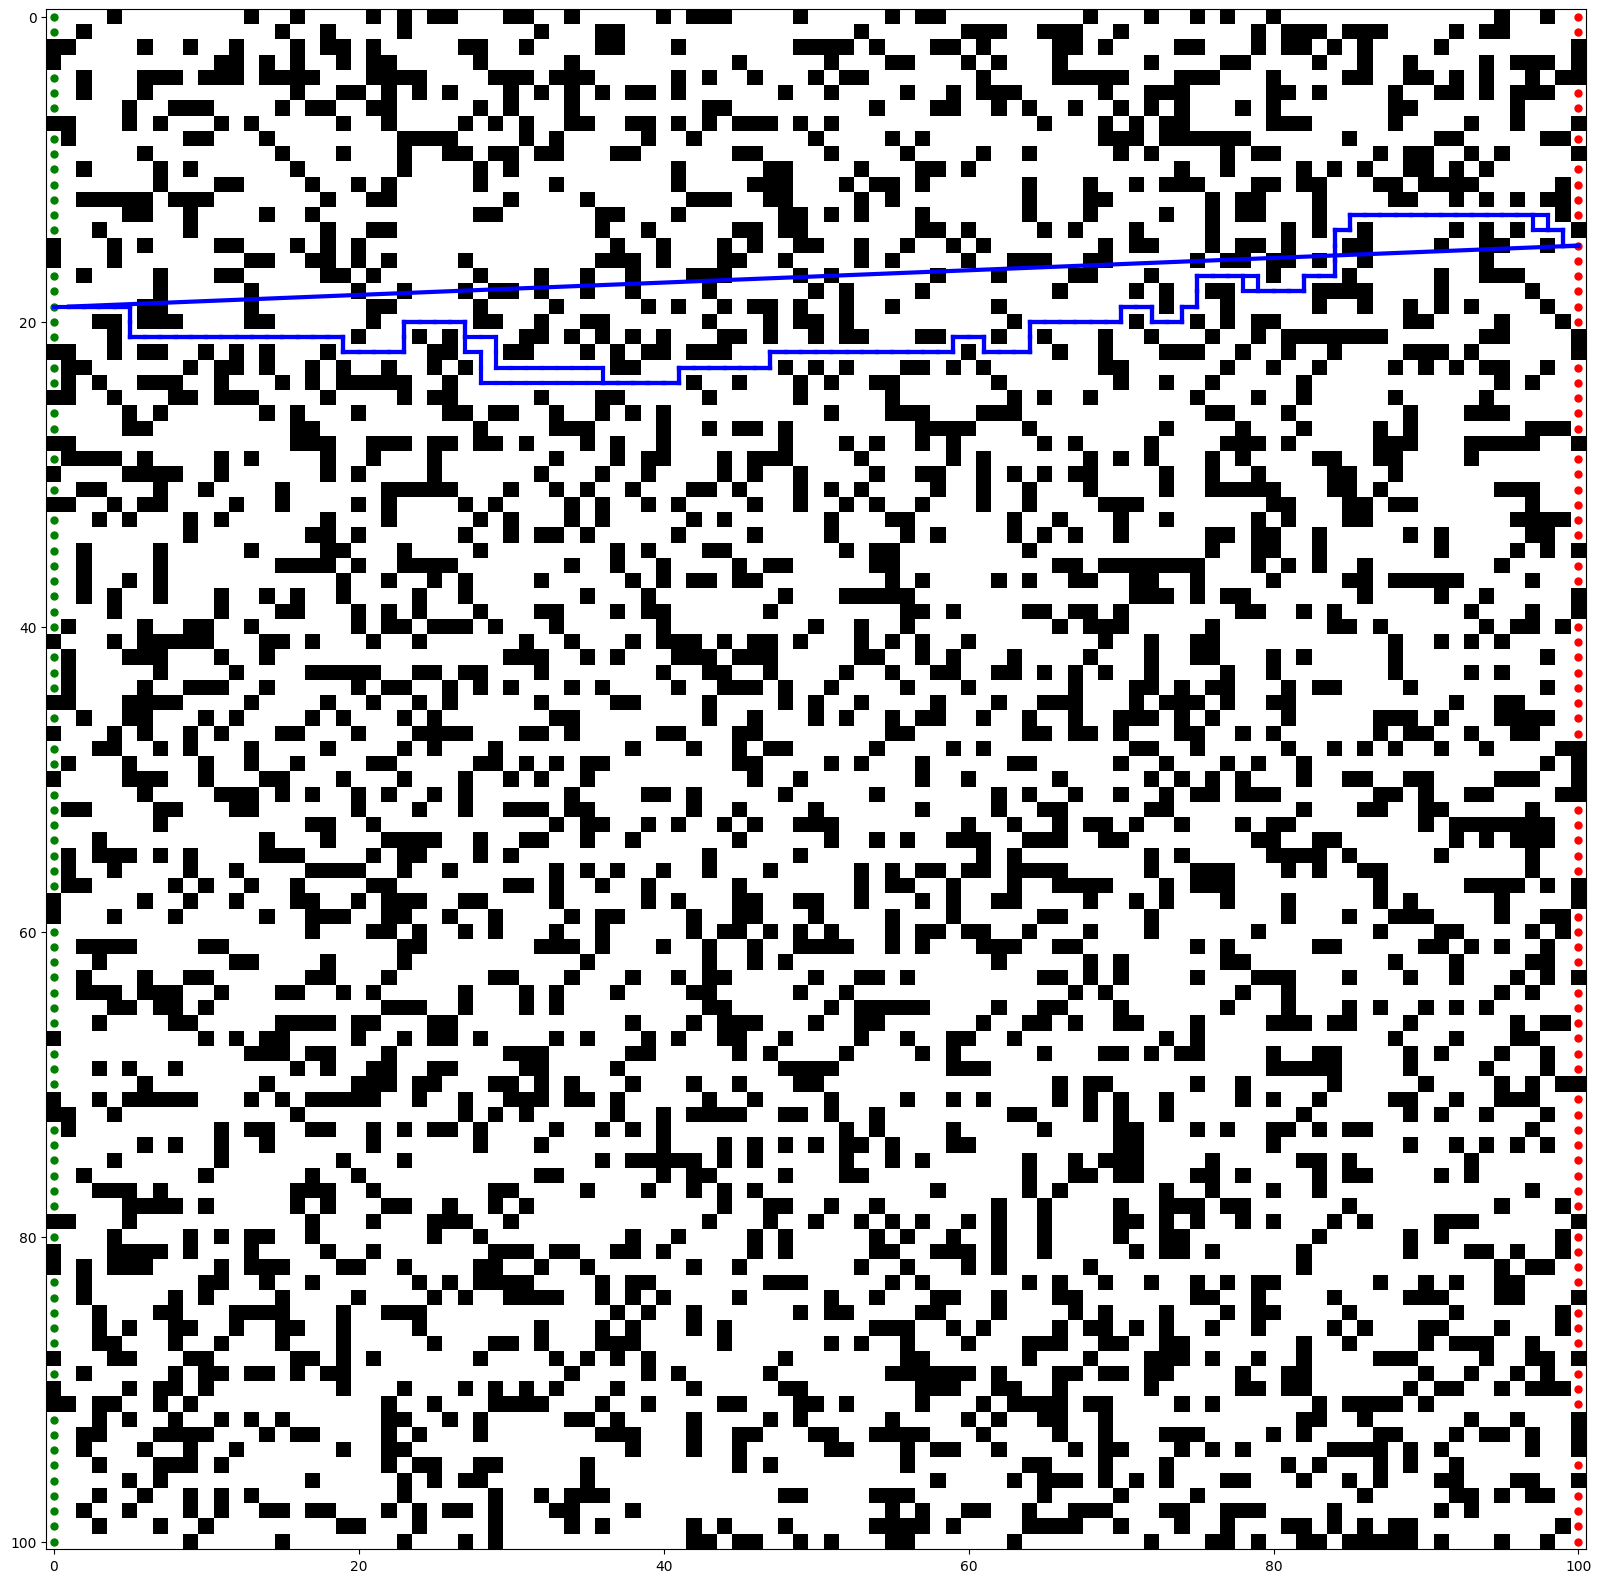

Muito bem esse meio poroso é percolado!
O caminho possui : 257 pontos
549.2535700798035 segundos


In [34]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = 100

maze = create_maze((end+1, end+1))

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')


tempo_final = time.time() # em segundos
#Print do tempo que demorou para rodar a parte específica do código
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

In [35]:
import heapq

def solve_maze(maze, starts, ends, method="bfs"):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def bfs(start, end):
        queue = [(start, [start])]
        visited = set()

        while queue:
            (x, y), path = queue.pop(0)
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        queue.append((next_pos, next_path))

        return None

    def astar(start, end):
        heap = [(0, start, [start])]
        visited = set()

        while heap:
            cost, current, path = heapq.heappop(heap)
            if current == end:
                return path

            if current not in visited:
                visited.add(current)
                for next_pos in get_adjacent_positions(current):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        next_cost = len(next_path) + heuristic_distance(next_pos, end)
                        heapq.heappush(heap, (next_cost, next_pos, next_path))

        return None

    def bidirectional_bfs(start, end):
        forward_queue = [(start, [start])]
        backward_queue = [(end, [end])]
        forward_visited = set()
        backward_visited = set()

        while forward_queue and backward_queue:
            (fx, fy), forward_path = forward_queue.pop(0)
            (bx, by), backward_path = backward_queue.pop(0)

            if (fx, fy) in backward_visited:
                return forward_path + backward_path[::-1][1:]
            if (bx, by) in forward_visited:
                return forward_path[::-1] + backward_path[1:]

            if (fx, fy) not in forward_visited:
                forward_visited.add((fx, fy))
                for next_pos in get_adjacent_positions((fx, fy)):
                    if is_valid_move(next_pos):
                        next_path = list(forward_path)
                        next_path.append(next_pos)
                        forward_queue.append((next_pos, next_path))

            if (bx, by) not in backward_visited:
                backward_visited.add((bx, by))
                for next_pos in get_adjacent_positions((bx, by)):
                    if is_valid_move(next_pos):
                        next_path = list(backward_path)
                        next_path.append(next_pos)
                        backward_queue.append((next_pos, next_path))

        return None

    def heuristic_distance(pos, end):
        return abs(end[0] - pos[0]) + abs(end[1] - pos[1])  # Manhattan distance

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    shortest_path = None
    shortest_path_length = float('inf')

    if method == "bfs":
        search_method = bfs
    elif method == "astar":
        search_method = astar
    elif method == "bidirectional":
        search_method = bidirectional_bfs
    else:
        raise ValueError("Invalid method. Choose 'bfs', 'astar', or 'bidirectional'.")

    for start in valid_starts:
        for end in ends:
            path = search_method(start, end)
            if path is not None and len(path) < shortest_path_length:
                shortest_path = path
                shortest_path_length = len(path)

    return shortest_path if shortest_path is not None else None

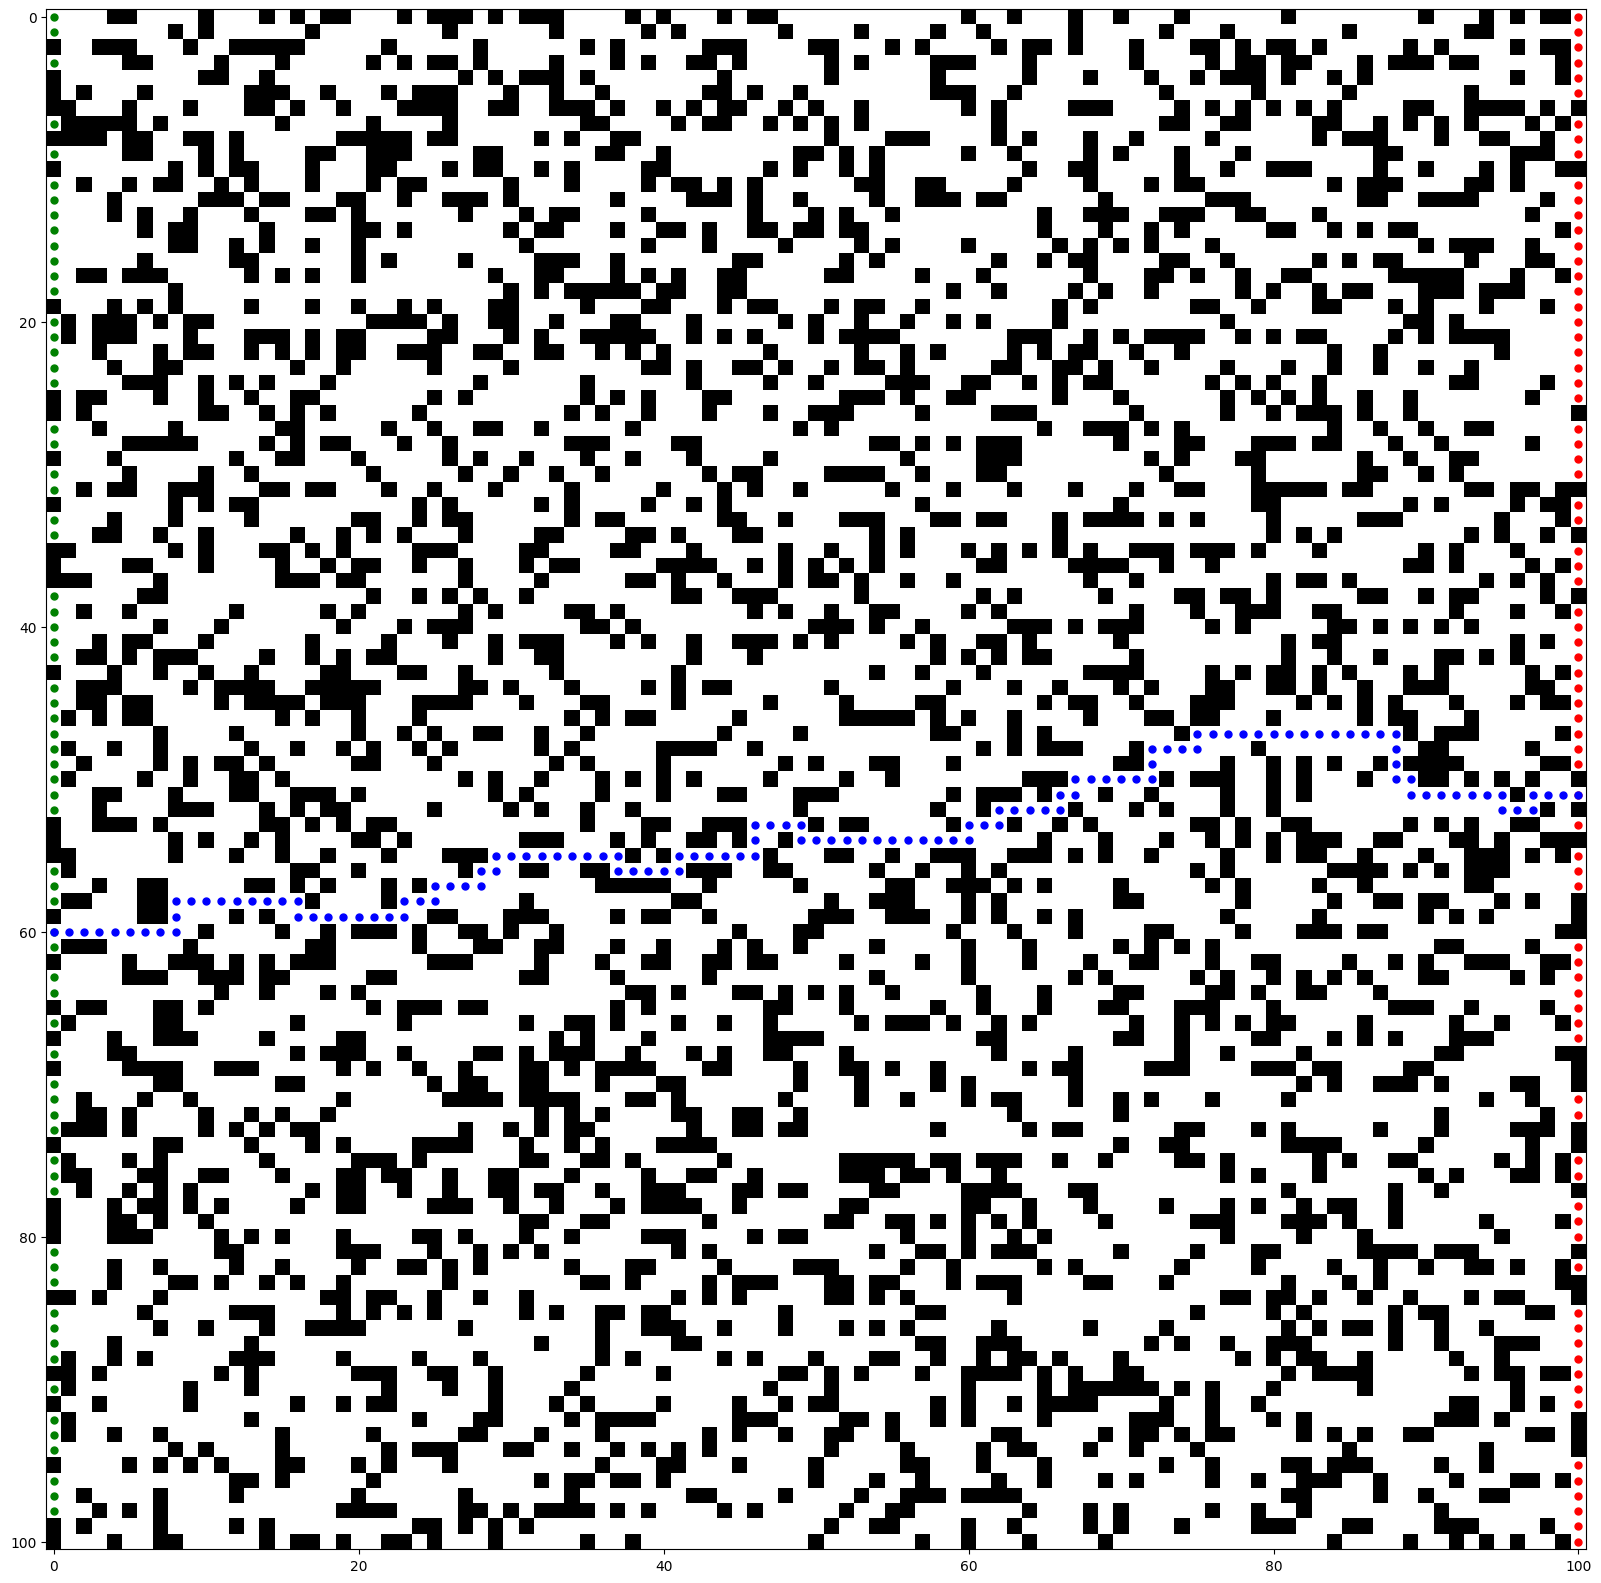

Muito bem esse meio poroso é percolado!
O caminho possui : 126 pontos
140.78431129455566 segundos


In [53]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = 100

maze = create_maze((end+1, end+1))

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path = solve_maze(maze, starts, ends, "astar")

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')


tempo_final = time.time() # em segundos
#Print do tempo que demorou para rodar a parte específica do código
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

In [97]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.animation import FuncAnimation
from PIL import Image

def animate_maze(maze, starts, ends, path, filename='maze_animation.gif'):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(maze, cmap=cmap, norm=norm)
    ax.axis('off')  # Remove the axis

    line, = ax.plot([], [], 'bo', markersize=2.5)  # Adjust the markersize here

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        x_coords = [pos[1] + 0.15 for pos in path[:frame]]  # Adjust x-coordinates for centering
        y_coords = [pos[0] + 0.15 for pos in path[:frame]]  # Adjust y-coordinates for centering
        line.set_data(x_coords, y_coords)
        return line,

    ani = FuncAnimation(fig, update, frames=len(path) + 1, init_func=init, blit=True)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=2.5)  # Adjust the markersize here

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=2.5)  # Adjust the markersize here

    # Set a title for the GIF
    ax.set_title('Maze Animation')

    ani.save(filename, writer='pillow', fps=10)
    plt.close(fig)
    print("Animation saved as", filename)

In [98]:
animate_maze(maze, starts, ends, path,'teste.gif')

Animation saved as teste.gif


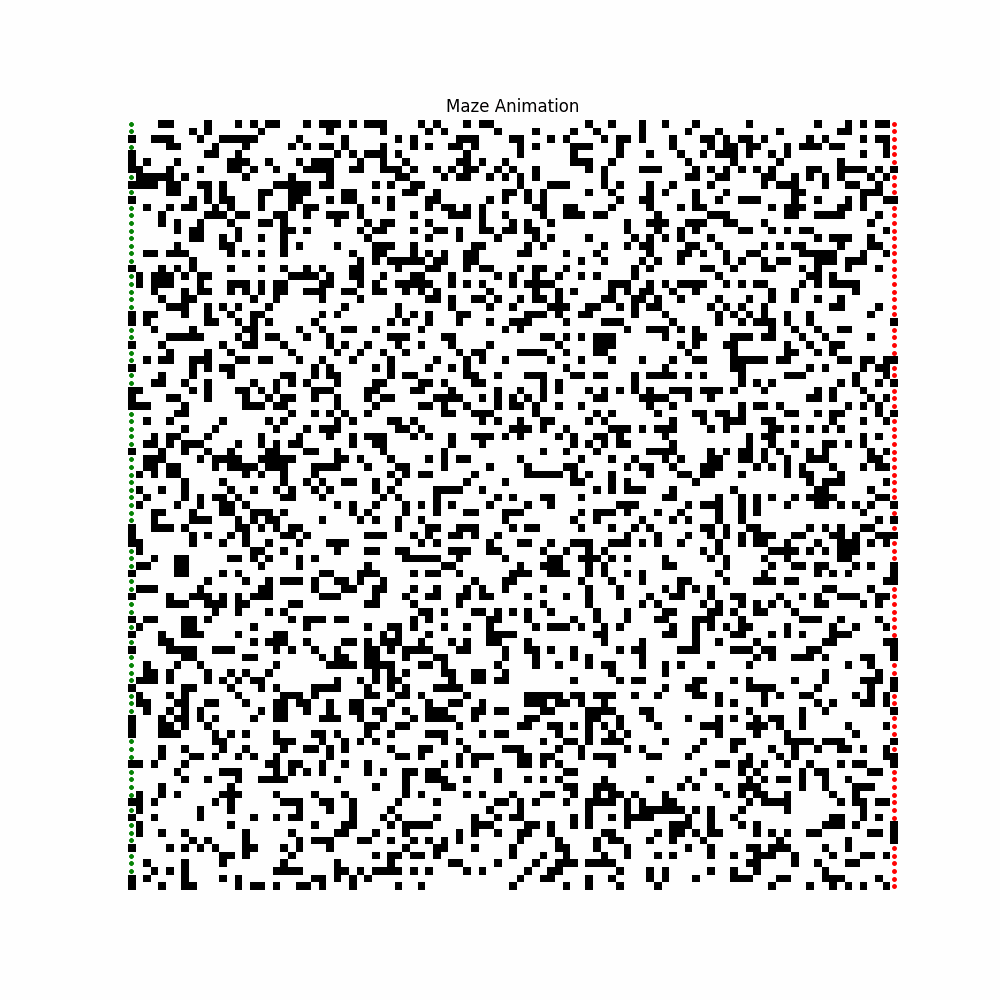

In [99]:
from IPython.display import Image, display

# Replace 'maze_animation.gif' with your actual GIF filename
display(Image(filename='teste.gif'))

# Carregar a imagem que veio do Pedro

In [27]:
import numpy as np
# load and show an image with Pillow
from PIL import Image
from numpy import asarray
from google.colab.patches import cv2_imshow

In [28]:
from PIL import Image
import numpy as np

In [29]:
def process_image(image_path):
    image = Image.open(image_path)
    image_binary = image.convert("1")
    image_array = np.array(image_binary)
    image_matrix = np.where(image_array == True, 1, 0)
    return image_matrix

In [30]:
# import required libraries
import cv2

# load the input image
img = cv2.imread('/content/random_blobs9.png')

# convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

error: ignored

In [ ]:
# apply thresholding to convert grayscale to binary image
ret,thresh = cv2.threshold(gray,10,255,0)

In [ ]:
# Display the Binary Image
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
thresh[:,0]

In [ ]:
inv=thresh.copy()

In [ ]:
inv[inv < 200] = 1

In [ ]:
inv[inv > 200] = 0

In [ ]:
inv

In [ ]:
draw_maze(inv,[],[])

# ALERTA!!


Essa imagem leva muito tempo, devido ao tamanho e as múltiplas opções de caminhos disponíveis.

In [ ]:
maze

In [ ]:
maze = inv

In [ ]:
maze.shape

In [ ]:
maze.shape[0]

In [ ]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = maze.shape[0]-1#248

# maze = create_maze((end+1, end+1))

# maze = inv#/255

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

In [ ]:
img_path ='/content/random_blobs9.png'
img = process_image(img_path)
draw_maze(img,[],[])

In [ ]:
maze = img

In [ ]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = maze.shape[0]-1#248

# maze = create_maze((end+1, end+1))

# maze = inv#/255

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

In [ ]:
def solve_and_display_maze(maze):
    tempo_inicial = time.time() # in seconds

    start = 0
    end = maze.shape[0] - 1

    entradas = maze[:, 0]
    lista_entradas = []
    linhas_entradas = np.where(entradas == 0)
    linhas_entradas = linhas_entradas[0].tolist()
    for i in range(0, len(linhas_entradas)):
        lista_entradas.append((linhas_entradas[i], start))

    saidas = maze[:, -1]
    lista_saidas = []
    linhas_saidas = np.where(saidas == 0)
    linhas_saidas = linhas_saidas[0].tolist()
    for i in range(0, len(linhas_saidas)):
        lista_saidas.append((linhas_saidas[i], end))

    starts = lista_entradas
    ends = lista_saidas

    path = solve_maze(maze, starts, ends)

    draw_maze(maze, starts, ends, path)

    tempo_final = time.time() # in seconds

    if path is None:
        print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')
    else:
        print('Muito bem esse meio poroso é percolado!')
        print(f'O caminho possui: {len(path)} pontos')

    print(f"{tempo_final - tempo_inicial} segundos")


In [ ]:
list_of_files = ['/content/random_blobs4.png','/content/random_blobs7.png','/content/random_blobs9.png']

for i in list_of_files:
  img = process_image(i)
  solve_and_display_maze(img)